In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
url='https://raw.githubusercontent.com/WaTheDarknest/CSI/main/Dataset/Time/2ESP32Dataset(30Sec).csv'
# อ่านข้อมูลไฟล์ csv จาก url
df=pd.read_csv(url)
# เเสดง 10 ตัวอย่างเเรก
df.head(10)

,Timestamp,TXSpot,R1,I1,R2,I2,R3,I3,R4,I4,...,R60,I60,R61,I61,R62,I62,R63,I63,R64,I64
0,0.418851,1,28,-64,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.425698,1,-99,-48,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.444691,1,-121,112,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.455975,1,-122,-31,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.479874,1,-122,-31,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.504687,1,82,-96,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.958187,1,82,-96,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.151100,1,82,-96,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.459740,1,82,-96,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.922480,1,82,-96,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# เเสดง 10 ตัวอย่างสุดท้าย
df.tail(10)

,Timestamp,TXSpot,R1,I1,R2,I2,R3,I3,R4,I4,...,R60,I60,R61,I61,R62,I62,R63,I63,R64,I64
8187,29.8949,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8188,29.9055,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8189,29.9116,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8190,29.9208,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8191,29.9308,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8192,29.9411,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8193,29.9551,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8194,29.9611,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8195,29.9742,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8196,29.9866,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# จัดกลุ่มข้อมูล (Classification) ด้วยวิธี K-Nearest Neighbours โดยใช้ library ของ scikit learn
from sklearn.model_selection import train_test_split
# นำเข้าคลาสของ KNeighborsClassifier StandardScaler เเละ train_test_split จาก scikit learn
from sklearn.neighbors import KNeighborsClassifier
# ปรับช่วงข้อมูลด้วยวิธี standardization
from sklearn.preprocessing import StandardScaler

แบ่งชุดข้อมูลออกเป็นชุดฝึกฝนเเละชุดทดสอบ

In [25]:
test_size=0.01

# 'I2', 'R3', 'I3', 'R4', 'I4', 'R5', 'I5', 'R6', 'I6', 'R60', 'I60', 'R61', 'I61', 'R62', 'I62', 'R63', 'I63', 'R64', 'I64'
# ไม่นำมาพิจารณาเนื่องจากค่าตัวแปรดังกล่าวของข้อมูลทุกชุดที่ได้จากกการเก็บตำแหน่งมีค่าเป็น 0 ทั้งชุดข้อมูล
X_train, X_test, y_train, y_test = train_test_split(
    df[['R1', 'I1', 'R2', 'I2', 'R7', 'I7', 'R8', 'I8', 'R9', 'I9', 'R10', 'I10', 'R11', 'I11', 'R12', 'I12', 'R13', 'I13', 'R14', 'I14', 'R15', 'I15', 'R16', 'I16'
       , 'R17', 'I17', 'R18', 'I18', 'R19', 'I19', 'R20', 'I20', 'R21', 'I21', 'R22', 'I22', 'R23', 'I23', 'R24', 'I24', 'R25', 'I25', 'R26', 'I26', 'R27', 'I27'
       , 'R28', 'I28', 'R29', 'I29', 'R30', 'I30', 'R31', 'I31', 'R32', 'I32', 'R33', 'I33', 'R34', 'I34', 'R35', 'I35', 'R36', 'I36', 'R37', 'I37', 'R38', 'I38'
       , 'R39', 'I39', 'R40', 'I40', 'R41', 'I41', 'R42', 'I42', 'R43', 'I43', 'R44', 'I44', 'R45', 'I45', 'R46', 'I46', 'R47', 'I47', 'R48', 'I48', 'R49', 'I49'
       , 'R50', 'I50', 'R51', 'I51', 'R52', 'I52', 'R53', 'I53', 'R54', 'I54', 'R55', 'I55', 'R56', 'I56', 'R57', 'I57', 'R58', 'I58', 'R59', 'I59']],
    df.TXSpot,
    test_size=test_size, random_state=7)

สร้างแบบจำลอง K-Nearest Neighbours ด้วยคลาส KNeighborsClassifier ใน Sklearn

In [26]:
prefer_k = 3  # สร้างตัวเเปรสำหรับเก็บ k ที่ต้องการ
model = KNeighborsClassifier(n_neighbors=prefer_k)
model

KNeighborsClassifier(n_neighbors=3)

In [27]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

ทดลองดูค่าผิดพลาดของแบบจำลองที่สร้างขึ้นโดยใช้ค่า R2

In [28]:
model.score(X_train, y_train)

0.99211337030191

In [29]:
model.score(X_test, y_test)

0.9878048780487805

ทดลองทดสอบประสิทธิภาพแบบจำลองด้วย cross validation

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
scores

array([0.97966728, 0.98336414, 0.98459643, 0.98336414, 0.97966728])

เเสดงค่าเฉลี่ยเเละค่าเบี่ยงเบนมาตรฐานของประสิทธิภาพ

In [31]:
from numpy import mean, std
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.982 (0.002)


ทดลองหาค่า k ที่เหมาะสมที่สุด

In [32]:
# กำหนดช่วงค่า K ที่ต้องการทดสอบให้เท่ากับ 1 ถึง 25
k_list = list(range(1,25+1))
k_values = dict(n_neighbors=k_list)

ปรับจูนพารามิเตอร์ของแบบจำลองโดยใช้ Library ชื่อ GridSearchCV ของ scikit-learn เพื่อทดสอบประสิทธิภาพของแบบจำลองสำหรับค่าพารามิเตอร์ต่าง ๆ ร่วมกับการประเมินผลด้วย cross-validation

In [33]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, k_values, cv=5, scoring='accuracy')

เรียนรู้แบบจำลอง

In [34]:
grid.fit(df[['R1', 'I1', 'R2', 'I2', 'R7', 'I7', 'R8', 'I8', 'R9', 'I9', 'R10', 'I10', 'R11', 'I11', 'R12', 'I12', 'R13', 'I13', 'R14', 'I14', 'R15', 'I15', 'R16', 'I16'
       , 'R17', 'I17', 'R18', 'I18', 'R19', 'I19', 'R20', 'I20', 'R21', 'I21', 'R22', 'I22', 'R23', 'I23', 'R24', 'I24', 'R25', 'I25', 'R26', 'I26', 'R27', 'I27'
       , 'R28', 'I28', 'R29', 'I29', 'R30', 'I30', 'R31', 'I31', 'R32', 'I32', 'R33', 'I33', 'R34', 'I34', 'R35', 'I35', 'R36', 'I36', 'R37', 'I37', 'R38', 'I38'
       , 'R39', 'I39', 'R40', 'I40', 'R41', 'I41', 'R42', 'I42', 'R43', 'I43', 'R44', 'I44', 'R45', 'I45', 'R46', 'I46', 'R47', 'I47', 'R48', 'I48', 'R49', 'I49'
       , 'R50', 'I50', 'R51', 'I51', 'R52', 'I52', 'R53', 'I53', 'R54', 'I54', 'R55', 'I55', 'R56', 'I56', 'R57', 'I57', 'R58', 'I58', 'R59', 'I59']], df.TXSpot)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25]},
             scoring='accuracy')

แสดงค่าประสิทธิภาพที่ได้

In [35]:
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015172,0.002269,0.480226,0.004978,1,{'n_neighbors': 1},0.992683,0.975000,0.993899,0.989018,0.989628,0.988045,0.006773,1
1,0.010252,0.001677,0.368723,0.073235,2,{'n_neighbors': 2},0.990854,0.975610,0.993899,0.988408,0.987797,0.987313,0.006234,2
2,0.009801,0.000616,0.377349,0.025920,3,{'n_neighbors': 3},0.992683,0.968902,0.992068,0.977425,0.985967,0.983409,0.009097,3
3,0.009465,0.000520,0.397592,0.007227,4,{'n_neighbors': 4},0.992073,0.968902,0.990848,0.978646,0.985967,0.983287,0.008602,4
4,0.010077,0.000839,0.400712,0.009163,5,{'n_neighbors': 5},0.989024,0.964634,0.987797,0.974375,0.984747,0.980115,0.009300,7


ทดลองพล็อตกราฟค่าประสิทธิภาพ

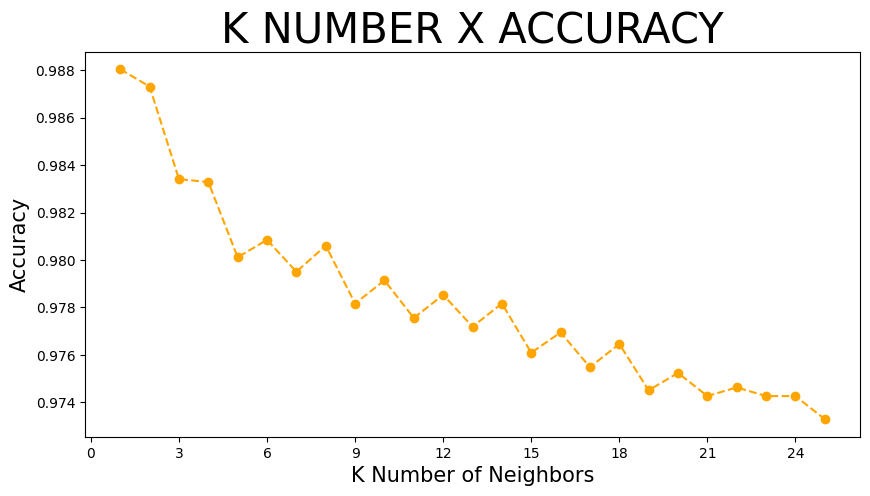

In [36]:
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='orange',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,26,3),)
plt.show()

เเสดงค่า k ที่ให้ประสิทธิภาพสูงสุด

In [37]:
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))

The best value of k = {'n_neighbors': 1} with 0.988045432223694 of accuracy.
